In [1]:
using Pkg
Pkg.activate("../EEG_plots/env")

  Activating project at `~/Desktop/EEG_plots/env`


In [2]:
import Pkg; Pkg.status()

Status `~/Desktop/EEG_plots/env/Project.toml`
  [13f3f980] CairoMakie v0.10.7
  [324d7699] CategoricalArrays v0.10.8
  [35d6a980] ColorSchemes v3.22.0
  [5ae59095] Colors v0.12.10
  [8f4d0f93] Conda v1.9.1
  [a93c6f00] DataFrames v1.6.1
  [1313f7d8] DataFramesMeta v0.14.0
  [5789e2e9] FileIO v1.16.1
  [e9467ef8] GLMakie v0.8.7
⌃ [6a3955dd] ImageFiltering v0.7.6
  [033835bb] JLD2 v0.4.33
  [ee78f7c6] Makie v0.19.7
  [e296ed71] MakieThemes v0.1.0
  [b98c9c47] Pipe v1.3.0
  [6c5003b2] PyMNE v0.2.1
  [6099a3de] PythonCall v0.9.14
  [ebc72ef8] SciPy v0.1.4
⌅ [2913bbd2] StatsBase v0.33.21
⌅ [3eaba693] StatsModels v0.6.33
  [2bdbdf9c] TopoPlots v0.1.4
  [181c99d8] Unfold v0.5.1
  [69a5ce3b] UnfoldMakie v0.3.2
  [ed8ae6d2] UnfoldSim v0.1.3
  [37e2e46d] LinearAlgebra
Info Packages marked with ⌃ and ⌅ have new versions available, but those with ⌅ are restricted by compatibility constraints from upgrading. To see why use `status --outdated`


In [3]:
using Unfold
using CairoMakie
using GLMakie
using Pipe
using LinearAlgebra
using TopoPlots
using PyMNE
using StatsBase # mean/std

using JLD2 # loading data
using ColorSchemes
using Colors
using DataFrames # for image
using DataFramesMeta # @subset etc. working with DataFrames
using ImageFiltering # for kernel
using StatsModels # UnfoldFit
using FileIO
using UnfoldMakie
using PythonCall
using CategoricalArrays
using MakieThemes
set_theme!(theme_ggthemr(:fresh))

Minimizing 2 	 Time: 0:00:00 ( 0.21  s/it)
Minimizing 57 	 Time: 0:00:00 ( 9.14 ms/it)


Minimizing 2 	 Time: 0:00:00 (61.76 ms/it)
  objective:  2380.5668557322774

Minimizing 56 	 Time: 0:00:00 ( 4.00 ms/it)
  objective:  2361.813002782447

Minimizing 113 	 Time: 0:00:00 ( 2.89 ms/it)
  objective:  2361.7132565842962

Minimizing 168 	 Time: 0:00:00 ( 2.55 ms/it)
  objective:  2361.5480564651484

Minimizing 225 	 Time: 0:00:00 ( 2.35 ms/it)
  objective:  2361.5457744169175

Minimizing 250 	 Time: 0:00:00 ( 2.30 ms/it)


    CondaPkg 

Found dependencies: /home/mikheev/.julia/packages/PyMNE/BTa7T/CondaPkg.toml


    CondaPkg Found dependencies: /home/mikheev/.julia/packages/PythonCall/qTEA1/CondaPkg.toml


    CondaPkg Dependencies already up to date


In [49]:
include("example_data.jl")
d_topo, positions = example_data("TopoPlots.jl")
uf_deconv = example_data("UnfoldLinearModelContinuousTime")
uf = example_data("UnfoldLinearModel")
results = coeftable(uf)
uf_5chan = example_data("UnfoldLinearModelMultiChannel")
d_singletrial, _ = UnfoldSim.predef_eeg(; return_epoched=true)

┌ Warning: Autocorrelation was NOT taken into account. Therefore SE are UNRELIABLE. Use at your own discretion
└ @ Unfold /home/mikheev/.julia/packages/Unfold/QYbQ3/src/solver.jl:70


([-0.04775006828121141 -0.2071934502314474 … -0.2961290597347705 -0.29789003791394847; 0.1557510979111391 -0.2651232078770881 … -0.4430665463276074 -0.48788326360793594; … ; -0.23384887186637143 0.03280811533729396 … -0.40086608150228564 -0.1631512956937874; -0.46968503443599563 0.005211575390744757 … -0.49582249586473054 -0.24922548003477749], 2000×2 DataFrame
  Row │ continuous  condition 
      │ Float64     String    
──────┼───────────────────────
    1 │   5.0       car
    2 │  -2.77778   car
    3 │   1.66667   car
    4 │  -1.66667   face
    5 │   3.88889   car
    6 │  -3.88889   car
    7 │   3.88889   face
    8 │   0.555556  car
  ⋮   │     ⋮           ⋮
 1994 │   2.77778   car
 1995 │   2.77778   face
 1996 │  -3.88889   face
 1997 │   0.555556  face
 1998 │  -5.0       car
 1999 │  -0.555556  car
 2000 │  -5.0       face
             1985 rows omitted)

# 1. ERP plot

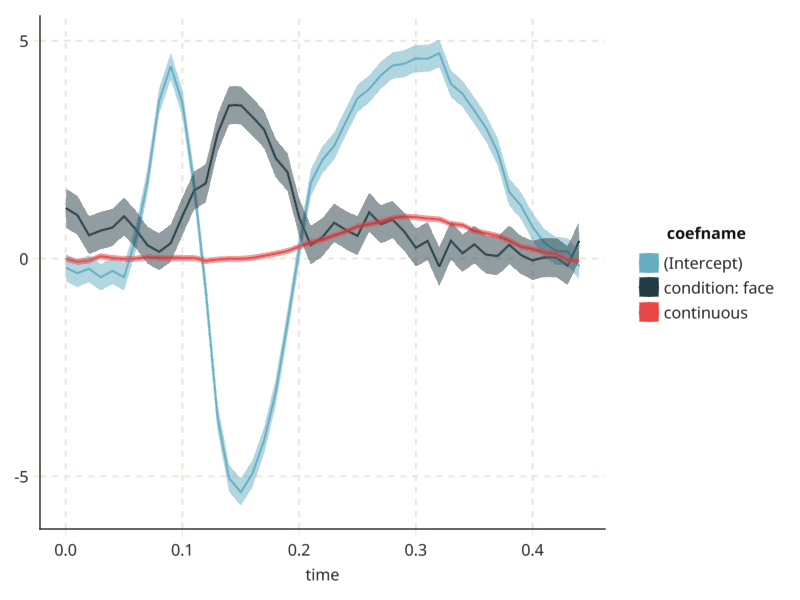

In [5]:
plot_erp(results; extra=(:stderror=>true,))

# 2. Butterfly plot

In [50]:
begin
    df, pos = example_data("TopoPlots.jl")
    #plot_butterfly(df)
    plot_butterfly(df; positions=pos)
end 

MethodError: MethodError: no method matching (::UnfoldMakie.NullInterpolator)(::LinRange{Float32, Int64}, ::LinRange{Float32, Int64}, ::Vector{Point{2, Float32}}, ::Vector{Float64}; mask::BitMatrix)

Closest candidates are:
  (::UnfoldMakie.NullInterpolator)(::LinRange, ::LinRange, ::AbstractVector{<:Point2}, ::AbstractVector{<:Number}) got unsupported keyword argument "mask"
   @ UnfoldMakie ~/.julia/packages/UnfoldMakie/0CuPa/src/plot_erp.jl:199


# 3. Topoplot

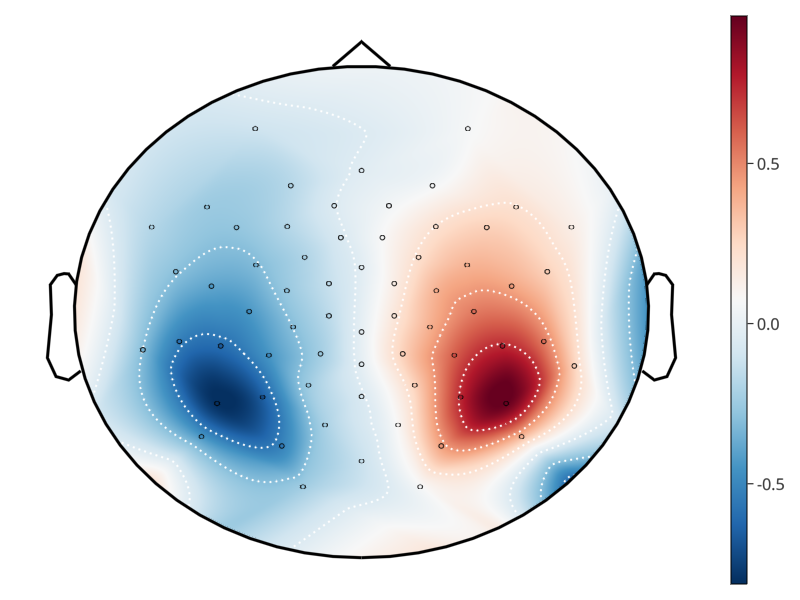

In [41]:
begin
    data, positions = TopoPlots.example_data()
    plot_topoplot(data[:,340,1]; positions=positions)
end

# 4. Topo series

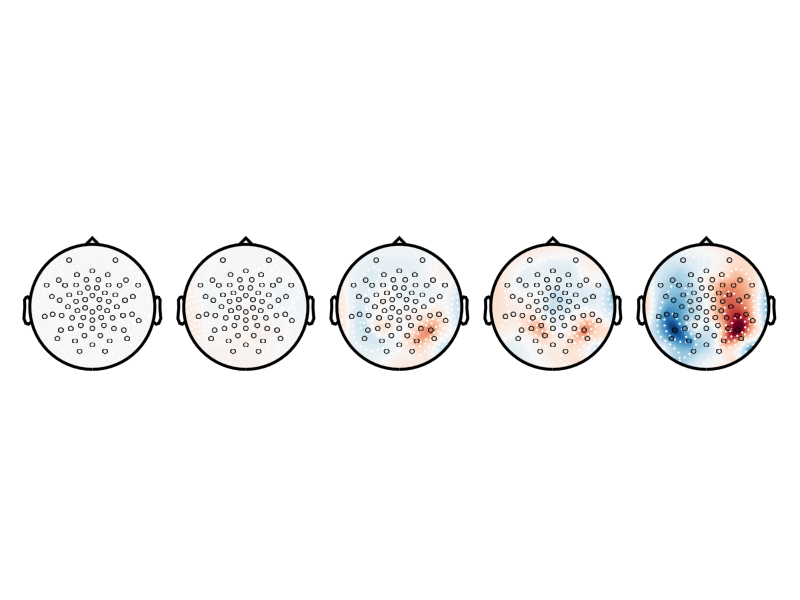

In [43]:
begin
    data, positions = TopoPlots.example_data()
    df = UnfoldMakie.eeg_matrix_to_dataframe(data[:,:,1],string.(1:length(positions)));
    insertcols!(df, 4, :channel =>  df[!, :label])
    Δbin = 80
    plot_topoplotseries(df,Δbin;positions=positions)
end
#d_topo, positions = example_data("TopoPlots.jl")

# 5. Channel Plot

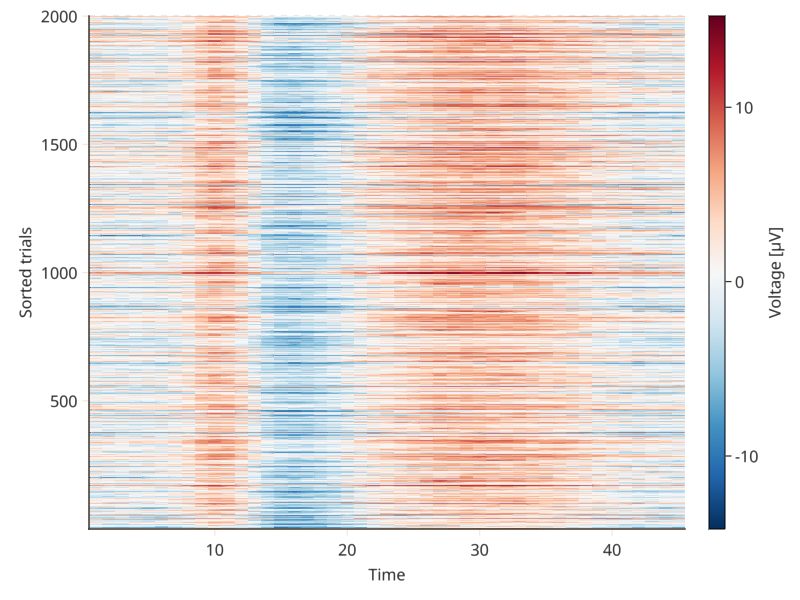

In [52]:
begin
    data,evts = UnfoldSim.predef_eeg(;noiselevel=10,return_epoched=true)
    plot_erpimage(data)
end

# 8. Parallel plot

In [51]:
begin
    include("example_data.jl")
    results_plot, positions = example_data();
    plot_parallelcoordinates(results_plot, [5,3,2]; labelrotation = 0.0 ,# this selects channel 5,3 & 2 
    mapping = (color=:coefname, y=:estimate))
end

KeyError: KeyError: key :labelrotation not found

# Combination

config.mapping = (color = :coefname, y = :estimate, x = :time)


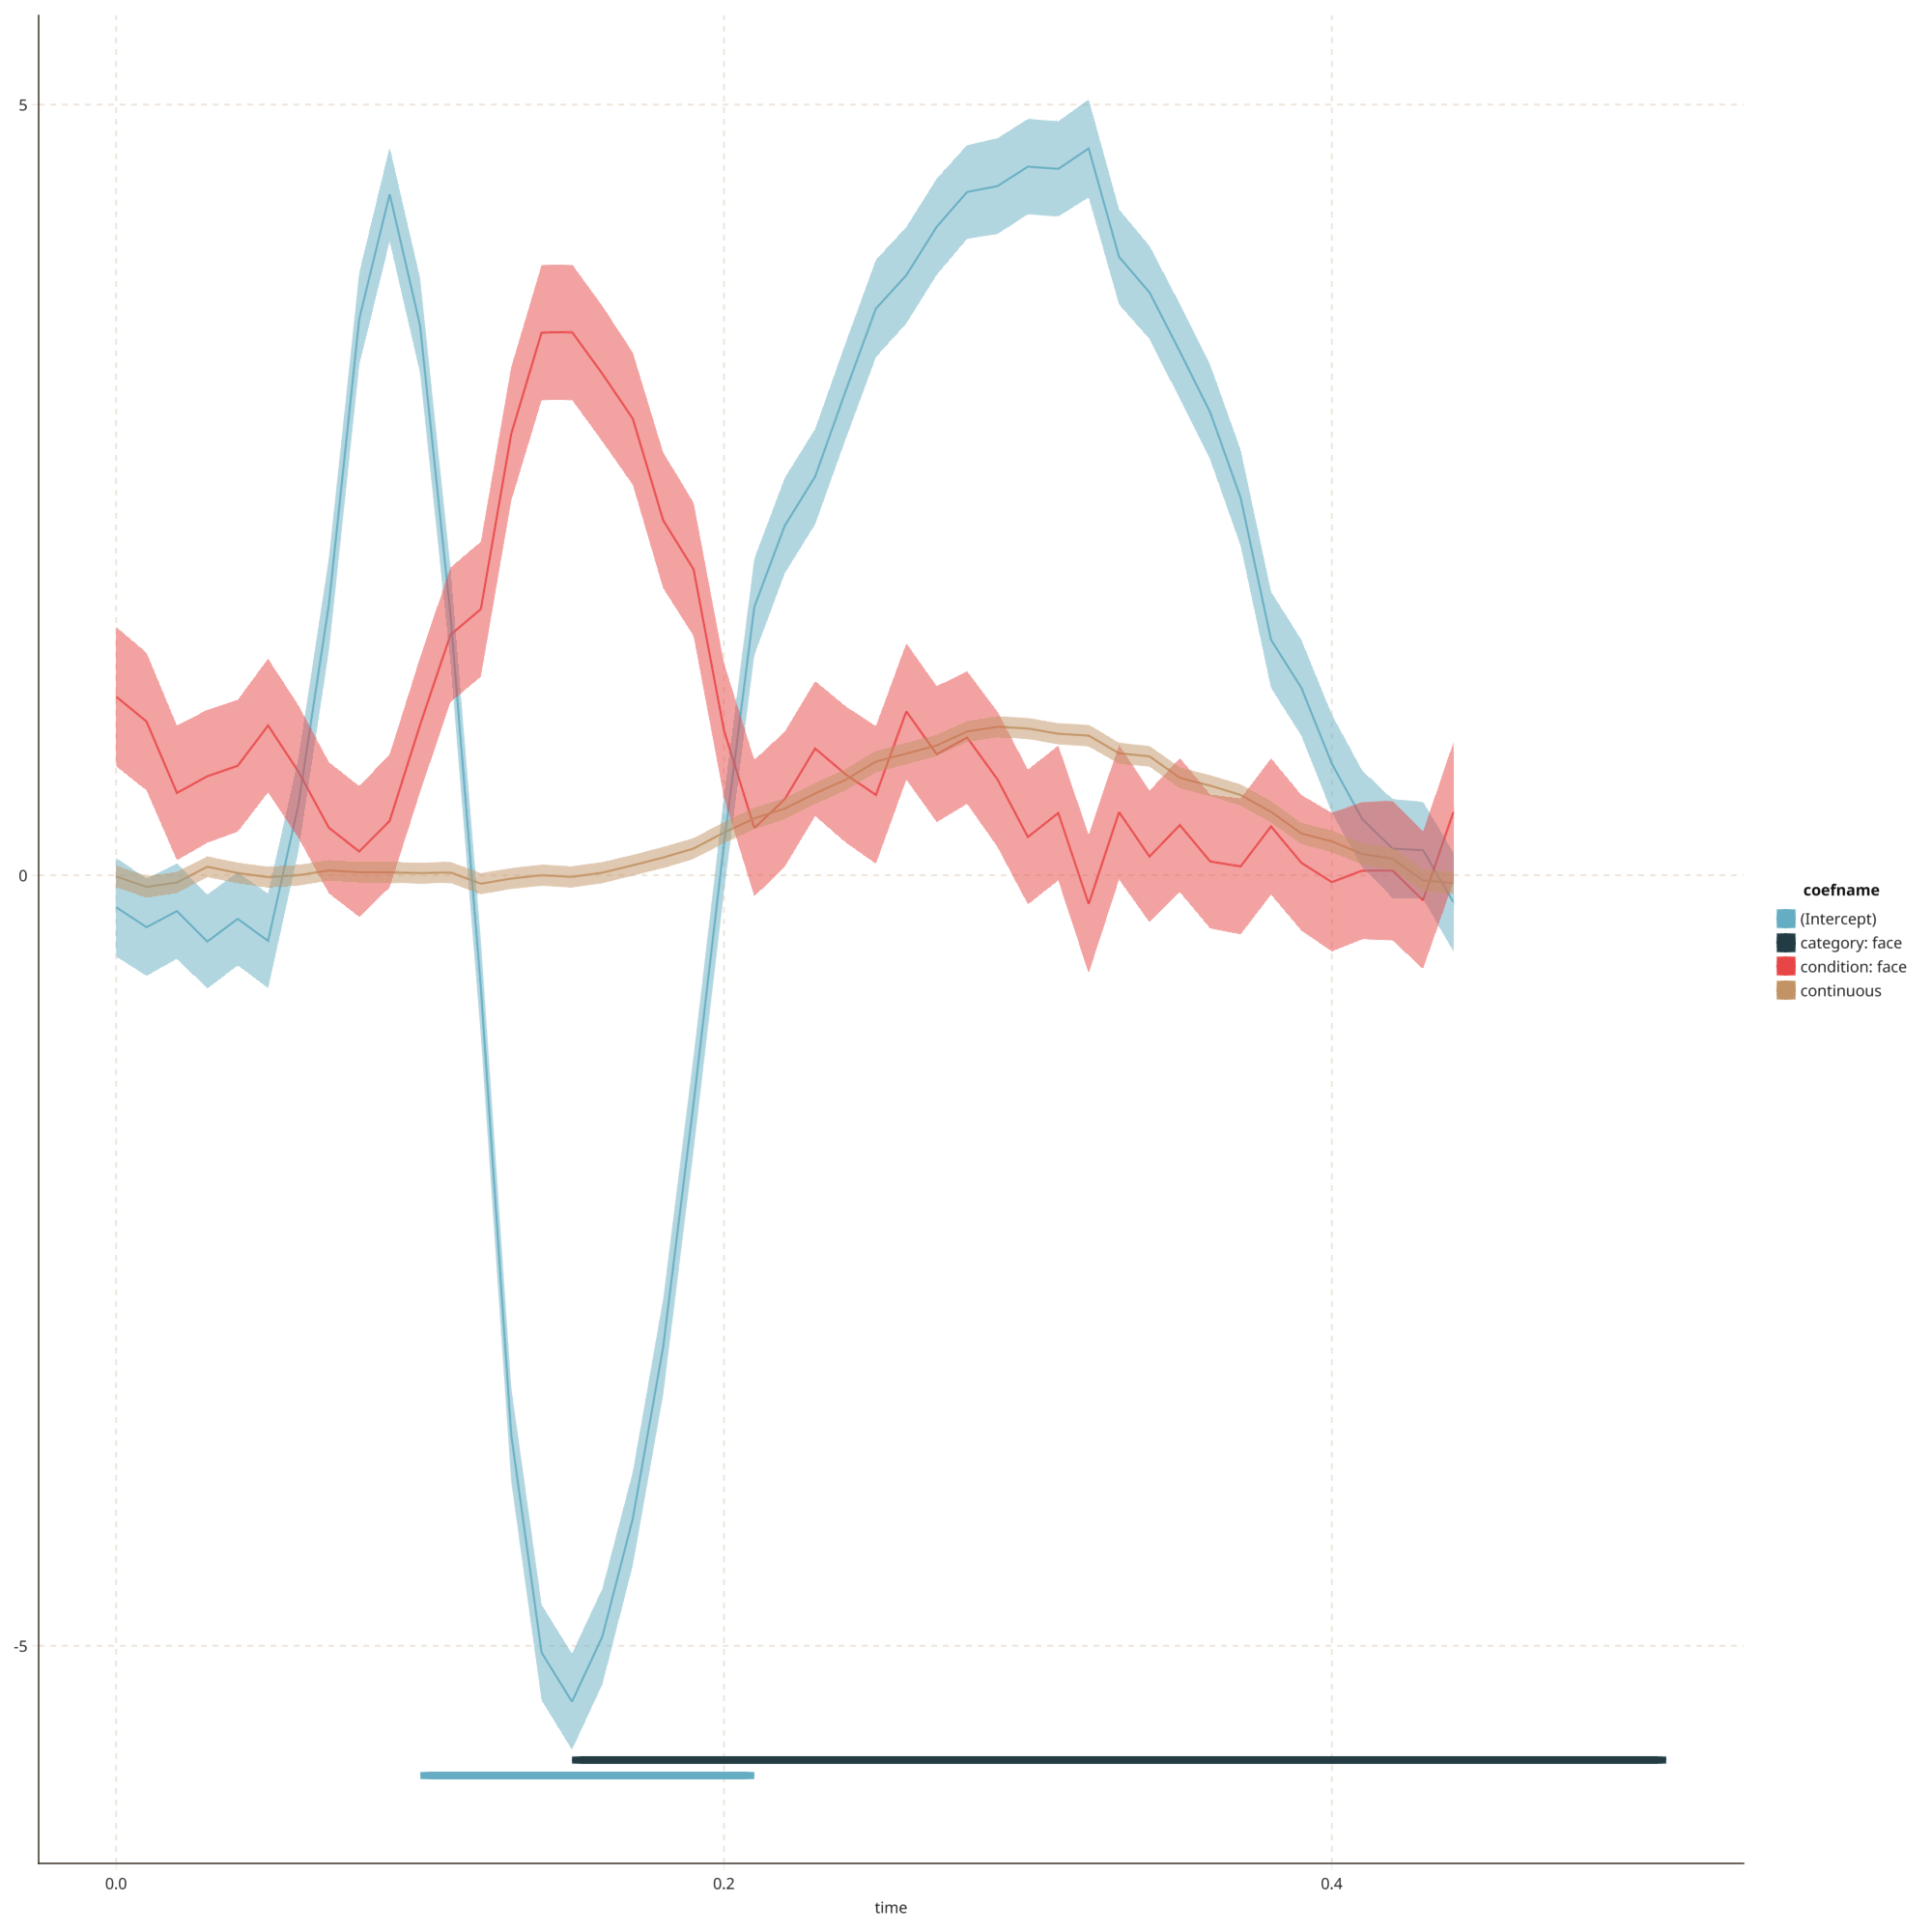

In [8]:
begin
    f = Figure(resolution = (2000, 2000))
    pvals = DataFrame(
            from=[0.1,0.15],
            to=[0.2,0.5],
            # if coefname not specified, line should be black
            coefname=["(Intercept)","category: face"]
        )
    plot_erp!(f[1, 1:3],results,extra=(;
            categoricalColor=false,
            categoricalGroup=false,
            pvalue=pvals,
            stderror=true))
    plot_butterfly!(f[1, 1:3], d_topo; positions=positions)
    f
end



plot_butterfly!(f[1, 1:3], d_topo;positions=positions)

pvals = DataFrame(
            from=[0.1,0.15],
            to=[0.2,0.5],
            # if coefname not specified, line should be black
            coefname=["(Intercept)","category: face"]
        )
plot_erp!(f[2,1:2],results,extra=(;
        categoricalColor=false,
        categoricalGroup=false,
        pvalue=pvals,
        stderror=true))

    
    plot_designmatrix!(f[2,3], designmatrix(uf))

    #plot_designmatrix!(f[2,4], designmatrix(uf_deconv);visual=(;colormap=:inferno))

    plot_topoplot!(f[3,1], collect(1:64);positions=positions,visual=(;colormap=:viridis))
    plot_topoplotseries!(f[4,1:3], d_topo,0.1;positions=positions,mapping=(; label=:channel))


res_effects = effects(Dict(:continuous=>-5:0.5:5),uf_deconv)

plot_erp!(f[2,4:5],res_effects;
    mapping = (;y=:yhat,color=:continuous, group=:continuous),
    extra=(;showLegend=true,
                    categoricalColor=false,
                    categoricalGroup=true),
    legend  = (;nbanks=2),
    layout  = (;legendPosition=:right))


   
    plot_parallelcoordinates!(f[3,2:3], uf_5chan,[1,2,3,4,5];mapping=(;color=:coefname),layout=(;legendPosition=:bottom))    

    plot_erpimage!(f[1,4:5],d_singletrial)
    plot_circulareegtopoplot!(f[3:4,4:5],d_topo[in.(d_topo.time,Ref(-0.3:0.1:0.5)),:];positions=positions,predictor=:time,extra=(;predictorBounds=[-0.3,0.5]))
f